# Interim Regression

## Configuration

In [1]:
INPUT_FILE = 'csvs/database_interim_regression.csv'

In [2]:
from lib.helpers import *
from lib.plots import *
from IPython.display import set_matplotlib_formats
from IPython.core.display import clear_output

%matplotlib inline
%load_ext autoreload
%autoreload 2
set_matplotlib_formats('retina', 'png', 'pdf')

## Read data

In [3]:
import pandas as pd

df = pd.read_csv(INPUT_FILE, na_values=['#NAME?'])

In [4]:
len(df)

12593

In [5]:
df.head(5)

,forecast,analysis
0,-0.305134,0.235915
1,2.771751,2.500271
2,5.132444,4.799907
3,12.315831,10.903847
4,0.489189,1.998613


#### Split into variables

In [6]:
y = df.forecast
X = df.drop(['forecast'], 1)

In [7]:
y.head(5)

0    -0.305134
1     2.771751
2     5.132444
3    12.315831
4     0.489189
Name: forecast, dtype: float64

In [8]:
X.head(5)

,analysis
0,0.235915
1,2.500271
2,4.799907
3,10.903847
4,1.998613


### Distribution of features

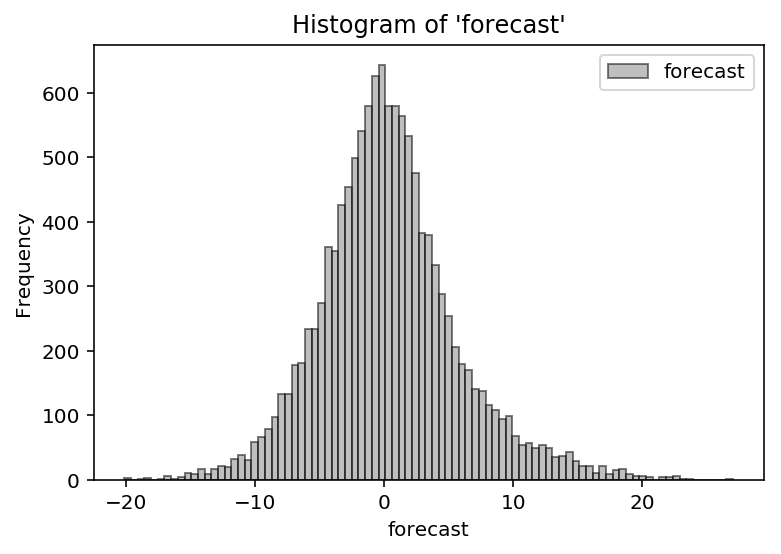

In [9]:
plot_histogram(y)

## Feature selection and model building

### Split processed data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=0)

In [11]:
print('Train: {}'.format(X_train.shape))
print('Test: {}'.format(X_test.shape))

Train: (9444, 1)
Test: (3149, 1)


### Shuffle train data

In [12]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X, y, random_state=0)

### Build model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=y_test.index, name='{}_prediction'.format(y_test.name))

get_scores([
    pd.Series([y_train, model.predict(X_train)], name='Training'),
    pd.Series([y_test, y_pred], name='Testing')
])

,EV,R2,RMSE
Training,0.960640,0.960640,1.053680
Testing,0.970727,0.970674,0.917508


#### Histogram compare

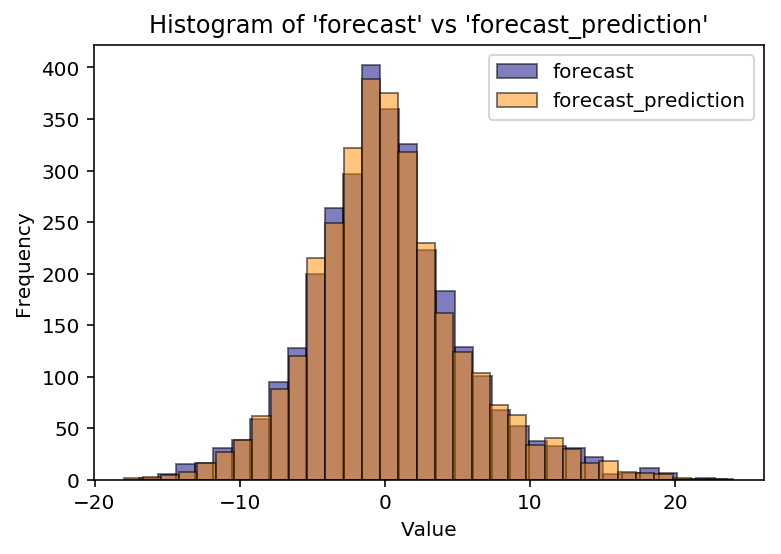

In [15]:
plot_histogram_compare(y_test, y_pred)

#### Scatter compare

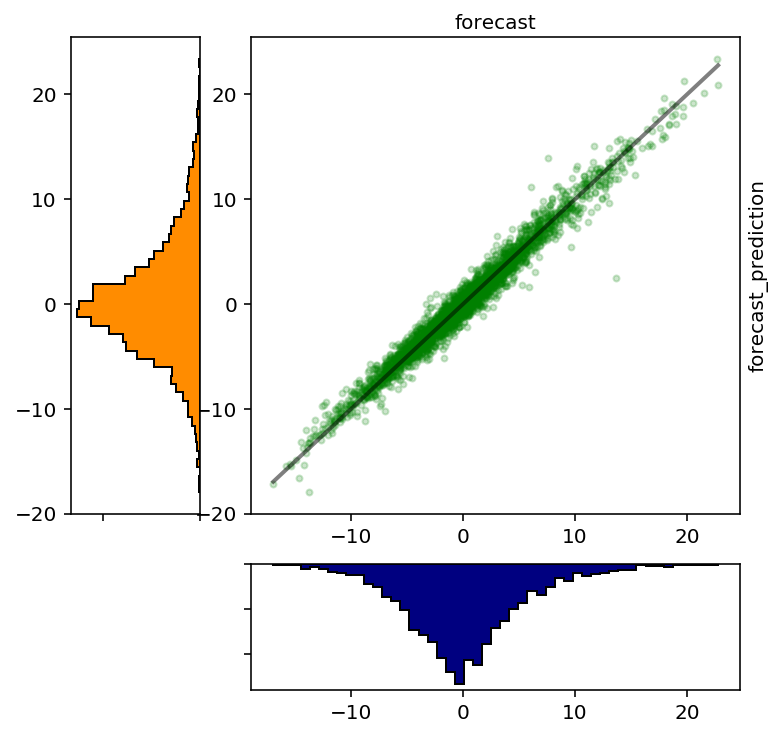

In [16]:
plot_scatter_histogram(y_test, y_pred)

#### Accuracy histogram

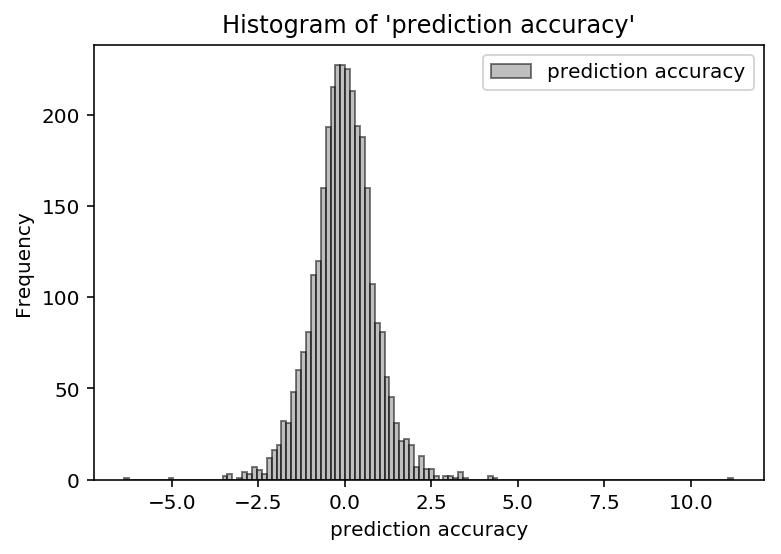

In [17]:
y_accuracy = pd.Series(y_test - y_pred, name='prediction accuracy')

plot_histogram(y_accuracy)